In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Map grain growth in clouds at several pressure levels

In [2]:
from maplib import load_out3
import map_growth as mg

In [3]:
OUTPUT_DIR = 'Cloud_Growth/'

lons  = np.arange(-180., 180.01, 15) # deg
lats  = np.arange(0., 67.51, 22.5) # deg
nprof = len(lons) * len(lats) # number of (lon, lat) profiles

p_convert = 1.e-6  # bar / (dyne/cm^2)

In [4]:
X, Y = np.meshgrid(lons,lats)

# Default contour levels to use
nlev = 21
log_zmin, log_zmax = -30, 5
lev  = np.linspace(log_zmin, log_zmax, nlev)

In [9]:
filename  = OUTPUT_DIR + 'jstar_map_{}.pdf'
valnames  = ['J*_C', 'J*_SiO', 'J*_TiO2']
P_WANT    = 0.01 # 10 mbar

Jstar  = mg.interpolate_pressure_map('nuclea', valnames, P_WANT)

Text(0.5, 1.0, '10 mbar')

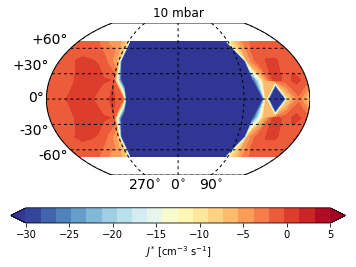

In [12]:
_ = mg.map_result(Jstar, lev,
               label=r'$J^{*}$ [cm$^{-3}$ s$^{-1}$]',
               ticks=np.arange(log_zmin, log_zmax+1)[::5])
plt.title('{:.0f} mbar'.format(P_WANT * 1.e3))